# K Means Clustering 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd


In [ ]:
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,45],[85,70],[71,80],[60,78],[55,52],[80,91],])

In [ ]:
kmeans = KMeans(n_clusters = 2)        # k=0 ,0,1
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
print(kmeans.cluster_centers_)                     # centroids of the cluster

[[70.2 74.2]
 [16.8 17. ]]


In [ ]:
print(kmeans.labels_)


[1 1 1 1 1 0 0 0 0 0]


In [ ]:
kmeans.predict([[0,0],[84,94]])           # unseen data

array([1, 0], dtype=int32)

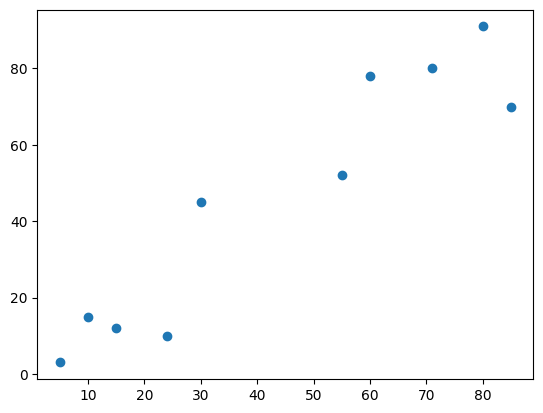

In [ ]:
plt.scatter(X[:,0], X[:,1], label = 'True Position')

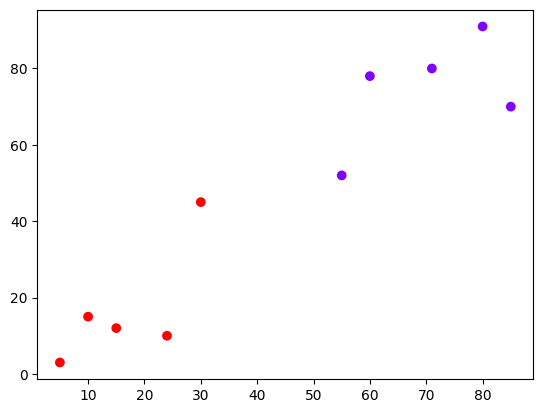

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')

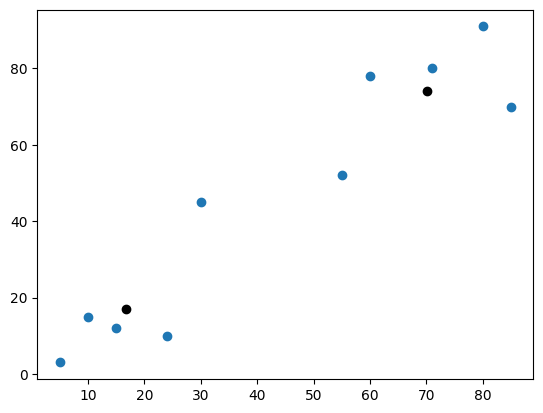

In [ ]:
plt.scatter(X[:,0], X[:,1], label = 'True Position')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_excel("Train.xlsx")
df.head()



# to apply remove the targert (segmentation) , without removing clustering there is no use of clustering

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df = df.drop(["Segmentation","ID"], axis = "columns")

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 520.7+ KB


In [ ]:
df = df.reset_index()
df

,index,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
6660,6660,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6
6661,6661,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
6662,6662,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
6663,6663,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [ ]:
df = df.drop("index", axis = "columns")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 468.8+ KB


In [ ]:
df_new = pd.get_dummies(df)                    # get dummies give extra columns so use encoders
df_new.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,67,1.0,1.0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,67,0.0,2.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,56,0.0,2.0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_kmeans= pd.get_dummies(df, drop_first= True)      # to remove redundandant columns
df_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,67,1.0,1.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,67,0.0,2.0,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,56,0.0,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,32,1.0,3.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Normalizaion

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)



In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3)                       # n_clusters = 3  ------ 3 Clusters will be created
clusters = kmeans_model.fit_predict(df_kmeans)              # fit_predict()   --------  gives the cluster no .. eg customer 1 under cluster 0 etc 
df_kmeans.insert(df_kmeans.columns.get_loc("Age"), "Cluster" , clusters)      # cluster column is created before age col (gives the loc where to create the cluster column)
df_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,22,1.0,4.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,67,1.0,1.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,67,0.0,2.0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,56,0.0,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,32,1.0,3.0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,0,41,0.0,5.0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6661,1,35,3.0,4.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6662,1,33,1.0,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6663,1,27,1.0,4.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_kmeans["Cluster"].value_counts()                 # gives data object count 

1    2755
0    2647
2    1263
Name: Cluster, dtype: int64

In [ ]:
df_kmeans.Cluster.unique()

array([1, 2, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

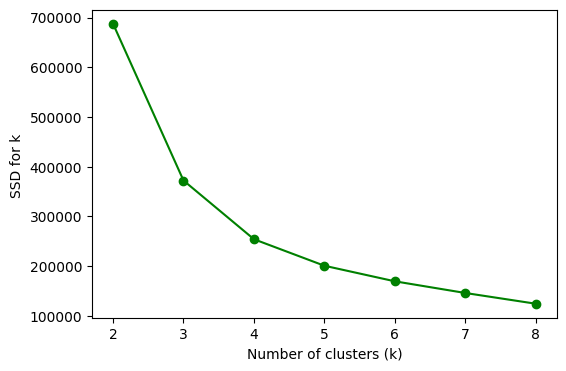

In [ ]:
ssd = []  #sum of squared distance (SSD)
for k in range(2,9):
    kmeans_model  = KMeans(n_clusters = k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize =(6,4), dpi = 100)
plt.plot(range(2,9), ssd , color="green", marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSD for k ")
plt.show()

# the so called elbow method is a common way to find the ideal numer of clusters within a dataset . It is called elbow becoz its takes the possible value 

